In [4]:
import torch
from torch.distributions.multinomial import Multinomial
import random
import matplotlib.pyplot as plt

In [5]:
torch.cuda.is_available()

False

In [ ]:
x = torch.arange(4, dtype=float, requires_grad=True)
y = torch.dot(x,x)
z = 2 * torch.dot(x,x)

y.backward()
print(x.grad)
x.grad.zero_()
z.backward()
print(x.grad)

tensor([0., 2., 4., 6.], dtype=torch.float64)
tensor([ 0.,  4.,  8., 12.], dtype=torch.float64)


In [12]:
x.grad.zero_()
# elementwise squaring
y = x * x
print(y)
y.backward(gradient=torch.ones(len(y)))  # Faster: y.sum().backward()
# should yield 2x
x.grad

tensor([0., 1., 4., 9.], dtype=torch.float64, grad_fn=<MulBackward0>)


tensor([0., 2., 4., 6.], dtype=torch.float64)

In [17]:
import matplotlib.pyplot as plt

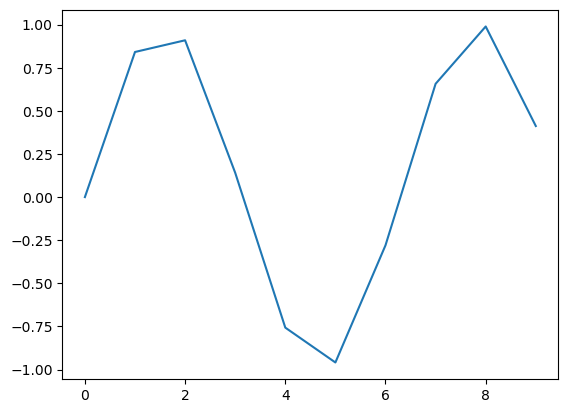

In [28]:
x = torch.arange(10, dtype=torch.float64, requires_grad=True)
y = torch.sin(x)

plt.plot(x.detach().numpy(), y.detach().numpy(), label='sin(x)')
plt.show()

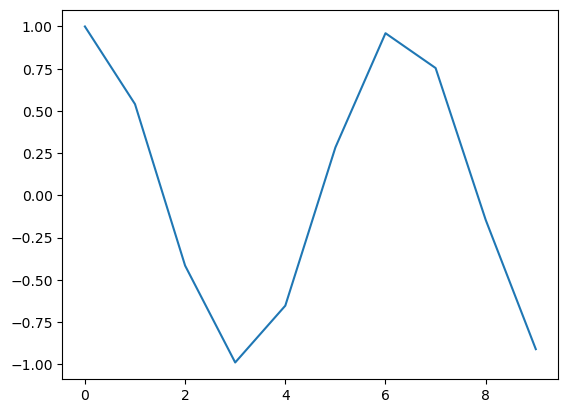

In [29]:
y.backward(gradient=torch.ones(len(y)))

plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label='gradient')
plt.show()

In [ ]:
samples = 10 ** 3

heads = sum([random.random() > 0.5 for _ in range(samples)])
tails = samples - heads

print(heads, tails)

In [ ]:
probs = torch.tensor([0.5, 0.5])
# heads or tails (samples, 2)
estimates = Multinomial(1, probs).sample((samples,))
print(estimates)

In [ ]:
cum_counts = estimates.cumsum(dim=0) # prefix sum type beat, (num heads, num tails)
print(cum_counts)

In [ ]:
# get the estimator
estimates = cum_counts / cum_counts.sum(dim=1, keepdim=True)
print(estimates)

In [ ]:
plt.plot(estimates[:, 0], label='heads')
plt.plot(estimates[:, 1], label='tails')
plt.axhline(0.5, color='black', linestyle='--')
plt.legend()
plt.show()